In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
#training dataset
df = pd.read_csv('/content/Barley_Blumeria_C04_2022.csv')

In [ ]:
df.head()

,sample_date,min_ta,max_ta,avg_ta,cum_rain,avg_hum,min_hum,max_hum,cum_leaf_wet,prim_output,Disease
0,2/8/2022,1.44,14.42,8.54,0.0,63.625000,22.5,63.5,0.000000,0,0
1,2/9/2022,-1.17,14.71,6.44,0.0,76.065217,54.0,89.0,5.150000,0,0
2,2/10/2022,4.04,10.33,7.13,0.0,80.307692,80.0,97.0,10.316667,0,0
3,2/11/2022,4.60,14.04,8.97,0.0,74.520833,32.0,96.0,5.983333,0,0
4,2/12/2022,1.10,11.22,5.88,0.0,71.958333,33.5,88.5,3.816667,0,0


In [ ]:
df.shape

(152, 11)

In [ ]:
df.isna().sum()

sample_date     0
min_ta          0
max_ta          0
avg_ta          0
cum_rain        0
avg_hum         0
min_hum         0
max_hum         0
cum_leaf_wet    0
prim_output     0
Disease         0
dtype: int64

In [ ]:
df['sample_date'] = pd.to_datetime(df['sample_date'], format='%m/%d/%Y')

print(df)

    sample_date  min_ta  max_ta  avg_ta  cum_rain    avg_hum  min_hum  \
0    2022-02-08    1.44   14.42    8.54       0.0  63.625000     22.5   
1    2022-02-09   -1.17   14.71    6.44       0.0  76.065217     54.0   
2    2022-02-10    4.04   10.33    7.13       0.0  80.307692     80.0   
3    2022-02-11    4.60   14.04    8.97       0.0  74.520833     32.0   
4    2022-02-12    1.10   11.22    5.88       0.0  71.958333     33.5   
..          ...     ...     ...     ...       ...        ...      ...   
147  2022-07-05   25.29   34.69   30.49       0.0  76.300000     60.5   
148  2022-07-06   27.77   34.22   31.60       0.0  78.700000     61.5   
149  2022-07-07   27.74   33.89   31.33       0.0  79.200000     65.5   
150  2022-07-08   25.10   33.62   30.04       0.0  54.900000     29.0   
151  2022-07-09   28.77   34.47   31.41       0.0  74.400000     64.0   

     max_hum  cum_leaf_wet  prim_output  Disease  
0       63.5      0.000000            0        0  
1       89.0      5.1

In [ ]:
df.describe()

,min_ta,max_ta,avg_ta,cum_rain,avg_hum,min_hum,max_hum,cum_leaf_wet,prim_output,Disease
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.0,152.000000
mean,10.218947,21.912368,16.095461,1.089474,64.602902,45.601974,88.121711,6.444737,0.0,0.046053
std,8.398989,8.382445,8.300380,4.158119,13.250985,14.879910,8.520330,5.252153,0.0,0.210292
min,-3.640000,4.260000,1.770000,0.000000,36.166667,18.000000,61.000000,0.000000,0.0,0.000000
25%,3.027500,14.517500,8.810000,0.000000,55.223958,35.000000,82.875000,2.175000,0.0,0.000000
50%,9.135000,21.255000,14.490000,0.000000,65.072917,43.500000,89.000000,6.266667,0.0,0.000000
75%,16.592500,29.730000,23.162500,0.000000,74.430208,54.000000,95.000000,9.770833,0.0,0.000000
max,29.880000,35.810000,32.370000,33.200000,92.770833,92.500000,100.000000,23.550000,0.0,1.000000


In [ ]:
df.columns

Index(['sample_date', 'min_ta', 'max_ta', 'avg_ta', 'cum_rain', 'avg_hum',
       'min_hum', 'max_hum', 'cum_leaf_wet', 'prim_output', 'Disease'],
      dtype='object')

In [ ]:
df.columns[df.isnull().any()]

Index([], dtype='object')

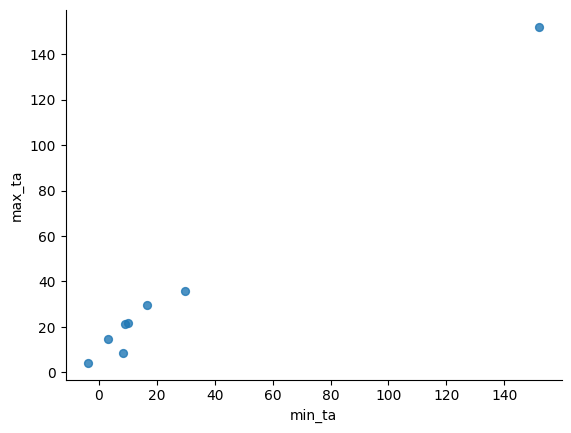

In [ ]:
from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='min_ta', y='max_ta', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

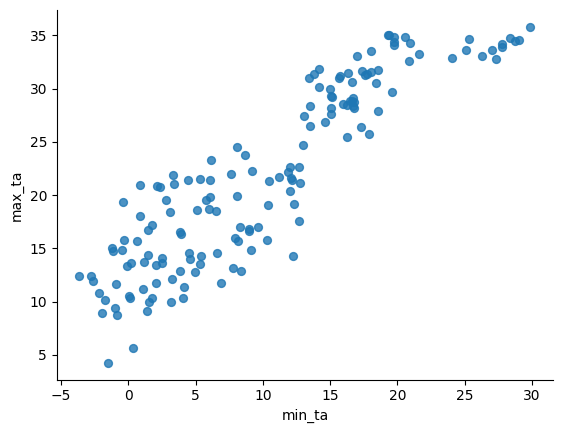

In [ ]:
# Scatter plot of temperature

df.plot(kind='scatter', x='min_ta', y='max_ta', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)


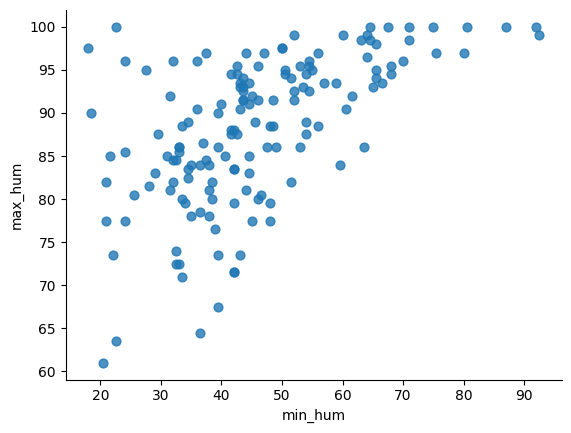

In [ ]:
# Scatter plot of Humidity

df.plot(kind='scatter', x='min_hum', y='max_hum', s=40, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

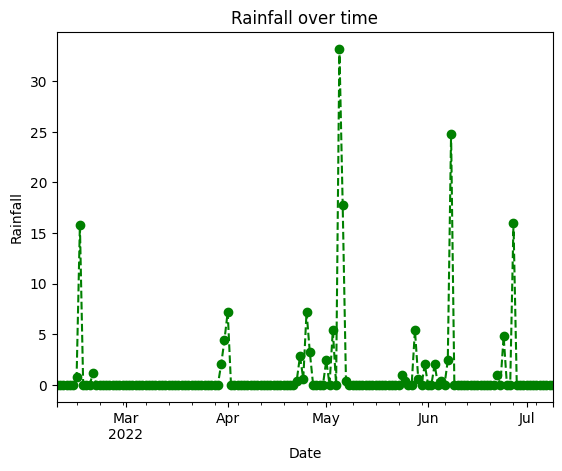

In [ ]:
# scatter date rainfall

df.groupby('sample_date')['cum_rain'].mean().plot(kind='line', color='green',marker='o', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.title('Rainfall over time')
plt.show()


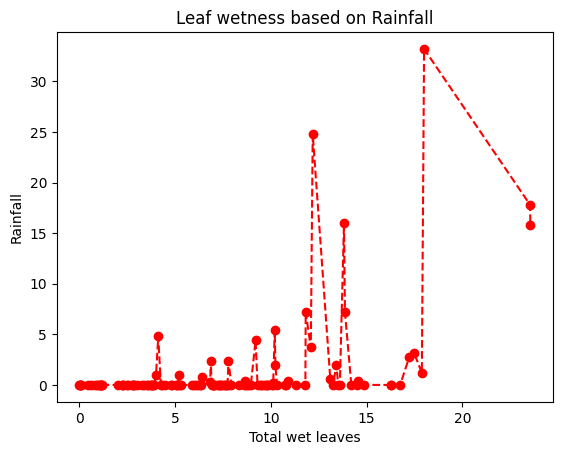

In [ ]:
df.groupby('cum_leaf_wet')['cum_rain'].mean().plot(kind='line', color='red',marker='o', linestyle='dashed')
plt.xlabel('Total wet leaves')
plt.ylabel('Rainfall')
plt.title('Leaf wetness based on Rainfall')
plt.show()

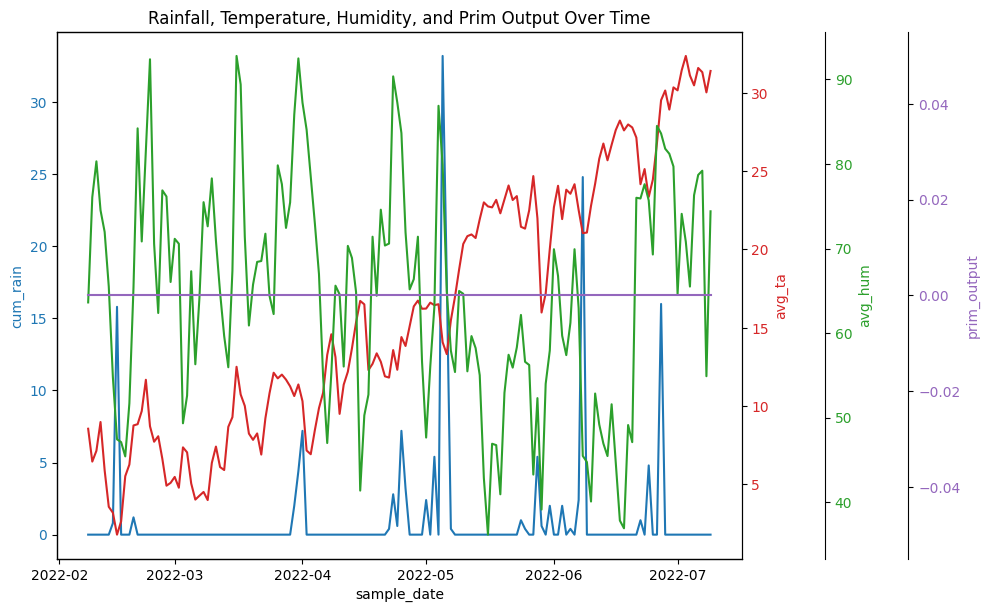

In [ ]:
# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting Rainfall
color = 'tab:blue'
ax1.set_xlabel('sample_date')
ax1.set_ylabel('cum_rain', color=color)
ax1.plot(df['sample_date'], df['cum_rain'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Creating a secondary y-axis for Temperature
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('avg_ta', color=color)
ax2.plot(df['sample_date'], df['avg_ta'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Creating a third y-axis for Humidity
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
color = 'tab:green'
ax3.set_ylabel('avg_hum', color=color)
ax3.plot(df['sample_date'], df['avg_hum'], color=color)
ax3.tick_params(axis='y', labelcolor=color)

# Creating a fourth y-axis for Prim Output
ax4 = ax1.twinx()
ax4.spines['right'].set_position(('outward', 120))
color = 'tab:purple'
ax4.set_ylabel('prim_output', color=color)
ax4.plot(df['sample_date'], df['prim_output'], color=color)
ax4.tick_params(axis='y', labelcolor=color)

# Adjust layout to prevent clipping of the secondary axes
fig.tight_layout()

plt.title('Rainfall, Temperature, Humidity, and Prim Output Over Time')
plt.show()

SPLITTING DATESET

In [ ]:
df1 = df.drop("sample_date", axis=1)
P = df1[["Disease"]]
X = df1.drop(["Disease"],axis=1)
Y = df1.drop(["Disease"],axis=1)
x_train,x_test,y_train,y_test = train_test_split(X,P,test_size=0.2,random_state=42)

In [ ]:
print(f'Train: {x_train.shape}, {y_train.shape}')
print(f'Test: {x_test.shape}, {y_test.shape}')

Train: (121, 9), (121, 1)
Test: (31, 9), (31, 1)


Random forest

In [ ]:
rf= RandomForestClassifier(random_state=42)
model_rf = rf.fit(x_train,y_train)
tr_pred_rf = model_rf.predict(x_train)
ts_pred_rf = model_rf.predict(x_test)

print("training accuracy is:",accuracy_score(y_train,tr_pred_rf))
print("testing accuracy is:",accuracy_score(y_test,ts_pred_rf))

training accuracy is: 1.0
testing accuracy is: 0.9354838709677419


<ipython-input-78-2a655bf3f7df>:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
predictions1 = logreg.predict(x_test)
logreg_acc = accuracy_score(y_test, predictions1)
print("Accuracy of the Logistic Regression Model is: ", logreg_acc)

Accuracy of the Logistic Regression Model is:  0.9354838709677419


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



SVM model

In [ ]:
svm_model = SVC(kernel='linear')

# Train the SVM model on the training data
svm_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(x_test)

# Calculate the accuracy of the SVM model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy: 0.9354838709677419


In [94]:
# Importing libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from collections import Counter
from scipy.stats import mode
from sklearn.svm import SVC
import seaborn as sns
import pandas as pd
import numpy as np

import warnings
# Suppress scikit-learn warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [96]:
# value using LabelEncoder
encoder = LabelEncoder()
df1["Disease"] = encoder.fit_transform(df1["Disease"])

X = df1.iloc[:, :-1]
y = df1.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=24
)

# Initializing Models
models = {
    "SVC": SVC(),
    "Gaussian NB": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=18),
}

# Create pipelines for each model
pipelines = {}
for model_name, model in models.items():
    pipelines[model_name] = Pipeline([("classifier", model)])

# Producing cross-validation score for the models
for model_name, pipeline in pipelines.items():
    scores = cross_val_score(
        pipeline, X, y, cv=10, n_jobs=-1, scoring="accuracy"
    )
    print("=" * 30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [0.9375     0.9375     1.         1.         1.         0.93333333
 0.93333333 0.93333333 0.93333333 0.93333333]
Mean Score: 0.9541666666666666
Gaussian NB
Scores: [0.9375     0.9375     0.93333333 1.         1.         0.93333333
 0.93333333 0.4        0.33333333 0.33333333]
Mean Score: 0.7741666666666667
Random Forest
Scores: [0.9375     0.9375     1.         1.         1.         0.93333333
 0.93333333 0.93333333 0.93333333 0.46666667]
Mean Score: 0.9075


Accuracy on train data by SVC Classifier: 95.0413223140496
Accuracy on test data by SVC Classifier: 96.7741935483871


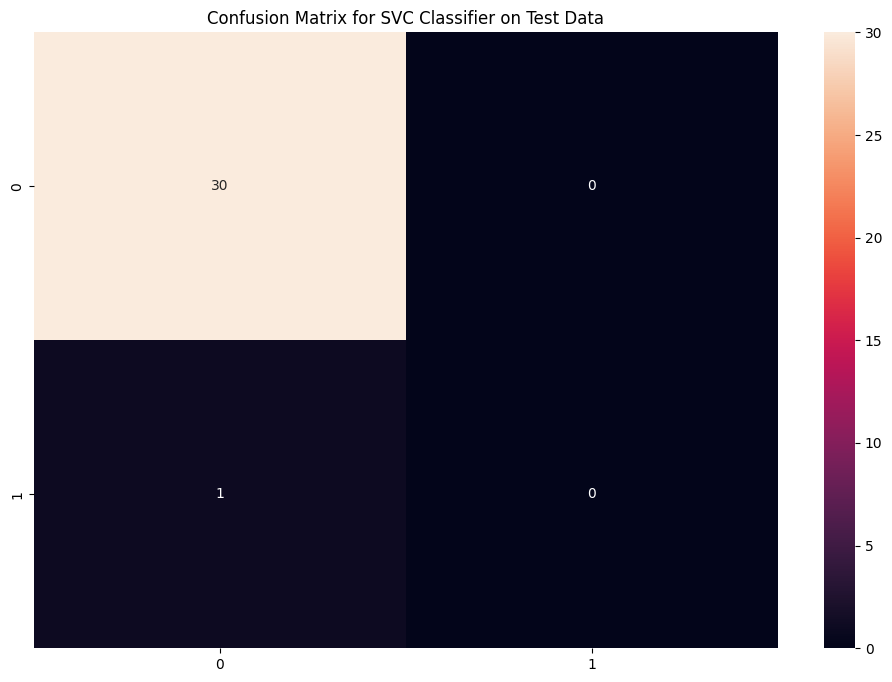

Accuracy on train data by Gaussian NB Classifier: 81.81818181818183
Accuracy on test data by Gaussian NB Classifier: 90.32258064516128


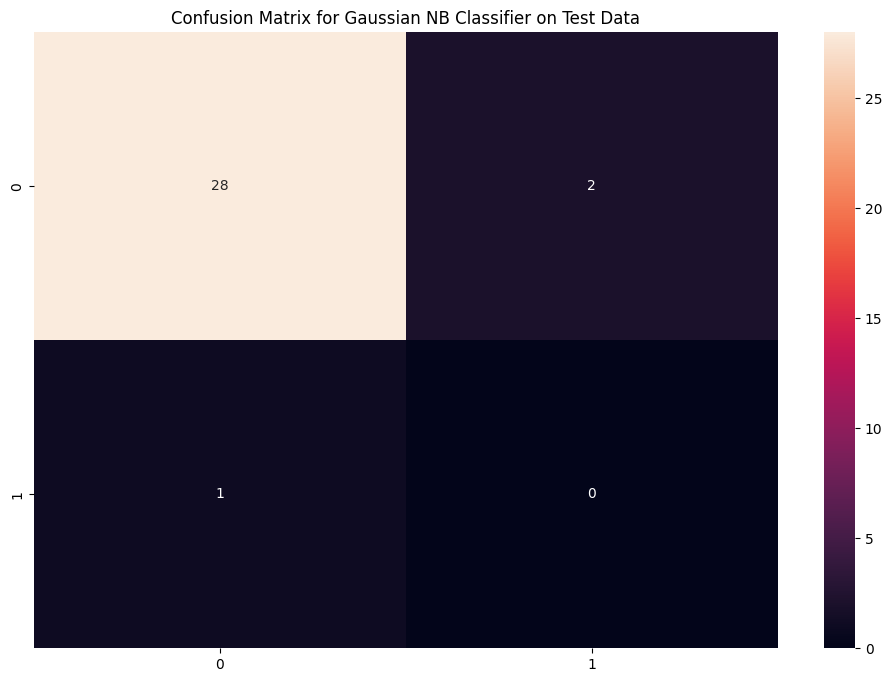

Accuracy on train data by Random Forest Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 96.7741935483871


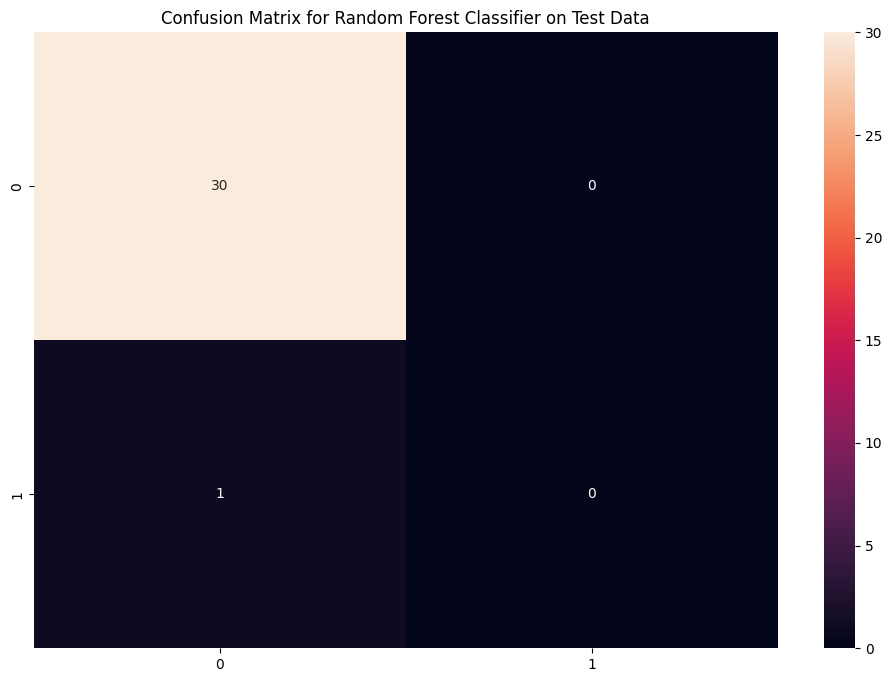

In [97]:
# Training and testing each model
for model_name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    preds = pipeline.predict(X_test)

    print(f"Accuracy on train data by {model_name} Classifier: {accuracy_score(y_train, pipeline.predict(X_train)) * 100}")
    print(f"Accuracy on test data by {model_name} Classifier: {accuracy_score(y_test, preds) * 100}")

    cf_matrix = confusion_matrix(y_test, preds)
    plt.figure(figsize=(12, 8))
    sns.heatmap(cf_matrix, annot=True)
    plt.title(f"Confusion Matrix for {model_name} Classifier on Test Data")
    plt.show()

In [99]:
# Training the models on whole data
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)

final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)


RandomForestClassifier(random_state=18)

Accuracy on Test dataset by the combined model: 96.7741935483871


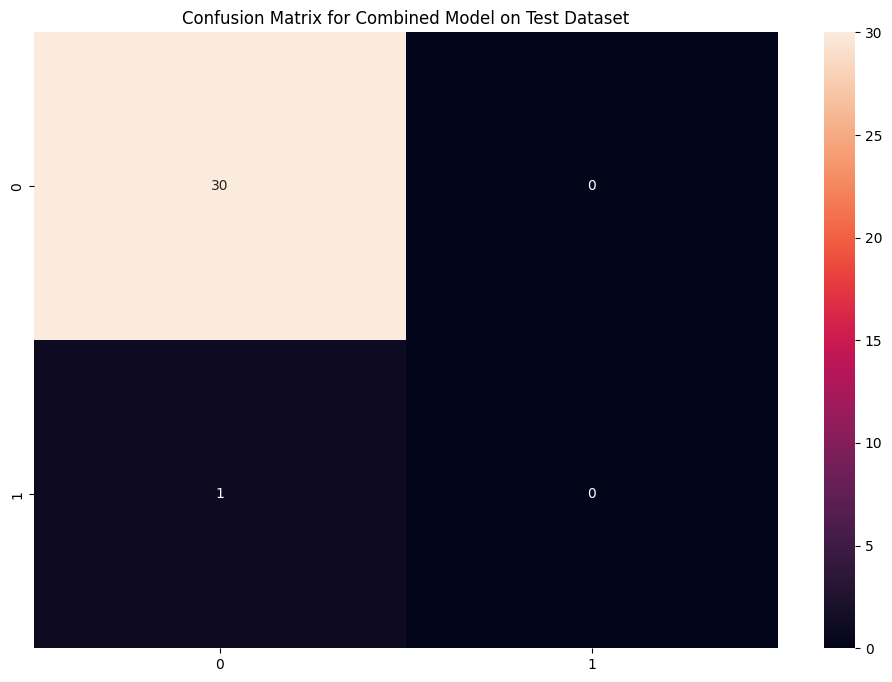

In [100]:
# Making predictions by taking the mode of predictions
# made by all the classifiers
svm_preds = final_svm_model.predict(X_test)
nb_preds = final_nb_model.predict(X_test)
rf_preds = final_rf_model.predict(X_test)

# Use SciPy's mode function
final_preds, _ = mode([svm_preds, nb_preds, rf_preds], axis=0)

# Calculating and printing accuracy on the test dataset
accuracy = accuracy_score(y_test, final_preds) * 100
print(f"Accuracy on Test dataset by the combined model: {accuracy}")

# Visualizing the confusion matrix
cf_matrix = confusion_matrix(y_test, final_preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()